In [ ]:
#IMPORTING THE PANDAS LIBRARY

import pandas as pd


In [ ]:
# DEFINING OUR DATA AS DATASET NAME 

dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
# IT SHOWS NO OF COLUMNS IN OUR DATASET

dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# TELLING WHAT IS OUR PREDICTOR THAT IS ** Y ** IN OUR DATASET 

y = dataset['Exited']

In [ ]:
# TELLING WHAT IS OUR PREDICT  THAT IS ** X ** IN OUR DATASET

X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [ ]:
# FROM HERE WE START DATA PREPROCESSING AND DATA CLEANING TYPICALLY KNOW AS DATA MINING

geo = dataset['Geography']

In [ ]:
# CREATING DUMMY VARIABLES

geo = pd.get_dummies(geo, drop_first=True )

In [ ]:
gender = dataset['Gender']

In [ ]:
gender = pd.get_dummies(gender, drop_first=True )

In [ ]:
# NOW APPENDING THE DUMMY VARIABLE CREATED IN THE DATASET....

X = pd.concat([X,gender,geo], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Male             10000 non-null  uint8  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [ ]:
# NOW FROM HERE WE START OUR MODEL TRAINING AND  MODEL SELECTION 

from keras.optimizers import Adam

In [ ]:
#SPLITTING THE DATA FOR THE PURPOSE OF TRAINING AND TESTING PART....
# BUDDY IF U WANT TO REDUCE THE TIME OF TRAINING FOR THE TESTING PURPOSE THEN JUST INCREASE THE THE RATIO FOR THER TRAINING AND TESTING DATA.....

from sklearn.model_selection import train_test_split

In [ ]:
# HERE AS U SEE THE TEST SIZE IS PUT 20%... FOR THE BASIC TESTING AND FAST PROCESSING U MAY CHANGE IT MANULLY FOR NOW TIMES.....

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from keras.models import Sequential

In [ ]:
# SO HERE WE CHOOSE THE SEQUENTIAL MODEL FOR THE PURPOSE OF MODEL TRAINING....

model = Sequential()

In [ ]:
from keras.layers import Dense

In [ ]:
# VARIABLE  HYPERVISOR = HY1 , HY2 , HY3, HY4 
# VARIABLE EPOCHS = EPOCHS1
# THE ABOVE LISTED ARE THE HYPERVISORS THAT U NEED TO CHANGE IN THE MODEL TRAINING.....
#

# DO THREE RUNS FOR THE PURPOSE OF TESTING PART
# FOR RUN 1  =>  HY1 = 6  ,  HY2 = 6  ,   HY3 = 6 ,  EPOCHS1 = 150
# FOR RUN 2 =>
HY1 = 7   
HY2 = 7     
HY3 = 7  
EPOCHS1 = 200
# FOR RUN 3  =>  HY1 = 8  ,  HY2 = 8  ,   HY3 = 8 ,  EPOCHS1 = 250

In [ ]:
model.add(Dense(units= HY1 , input_dim=11, activation='relu' ))

In [ ]:
model.add(Dense(units= HY2, activation='relu'))

In [ ]:
model.add(Dense(units= HY3, activation='relu'))

In [ ]:
model.add(Dense(units= 1 ,  activation='sigmoid' ))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000001),loss='binary_crossentropy' ,metrics=['accuracy'] )

In [ ]:
model.fit(X_train,y_train , epochs= EPOCHS1 , verbose=0)

In [ ]:
df_loss = pd.DataFrame(model.history.history)

In [ ]:
# THIS WHOLE CODE WILL GIVE U THE ACCURACY OF THE MODEL WHICH IS THE OUTPUT OF THE CODE.....
# FROM THAT U WILL GET TO KNOW WHAT IS THE ACCURACY OF THE MODEL THAT WE ARE TRAINING RIGHT NOW.....

import numpy
cvscores = []
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


accuracy: 30.55%
30.55% (+/- 0.00%)


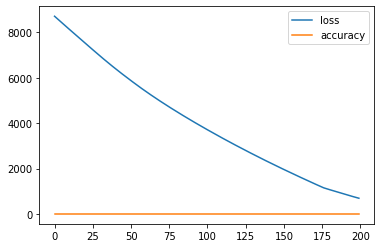

In [ ]:
# THIS ISJUST THE GRAPH OF THE LOSS THAT SHOWS THE LOSS PATTERN IN THE MODEL..
# A MODEL IS SSAID TO BE GOOD IF THE LOSS AT THE END OF THE MODEL IS VERY LESS...
# LESSER THE LOSS BETTER WILL BE THE MODEL HENCE PRECISE ACCURACY.....


df_loss.plot()